                             HOUSE PRICE PREDICTION WITH LINEAR REGRESSION 

                                          
##                                          1. DATA COLLECTION
   

In [1]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

IMPORT LIBRARY

In [2]:
#%pip install -U scikit-learn
#%pip install seaborn
#%pip install piplite
#%pip install --upgrade pip


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline
#import piplite
#await piplite.install('seaborn')

In [3]:
df=pd.read_csv("/home/ammar-ahmed-siddiqui/Downloads/Housing dataset.csv")

In [4]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [5]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


                                         
##                                         2. EXPLORATORY DATA ANALYSIS

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [8]:
print("Number of rows",df.shape[0])
print("Number of columns",df.shape[1])

Number of rows 545
Number of columns 13


In [9]:
#df.unique()
print("Is there any null or missing values ? ",df.isnull().sum().any())
print("percentage of null values in particular column",df.isnull().sum()/len(df)*100)

Is there any null or missing values ?  False
percentage of null values in particular column price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64


In [10]:
print("THERE IS NO MISSING OR NULL VALUES IN THE DATASET",df.isnull().sum())

THERE IS NO MISSING OR NULL VALUES IN THE DATASET price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [11]:
#CONVERTING CATEGORICAL DATA INTO NUMERICAL DATA
binary = { "yes" : 1 , "no" : 0}
status = { "furnished" : 1 , "semi-furnished" : 2 , "unfurnished" : 0 }
df["mainroad"]=df["mainroad"].map(binary)
df["guestroom"]=df["guestroom"].map(binary)
df["basement"]=df["basement"].map(binary)
df["hotwaterheating"]=df["hotwaterheating"].map(binary)
df["airconditioning"]=df["airconditioning"].map(binary)
df["prefarea"]=df["prefarea"].map(binary)
df["furnishingstatus"]=df["furnishingstatus"].map(status)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,2
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1


In [12]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,1.089908
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.858130
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


In [13]:
df.dtypes

price               int64
area                int64
bedrooms            int64
bathrooms           int64
stories             int64
mainroad            int64
guestroom           int64
basement            int64
hotwaterheating     int64
airconditioning     int64
parking             int64
prefarea            int64
furnishingstatus    int64
dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

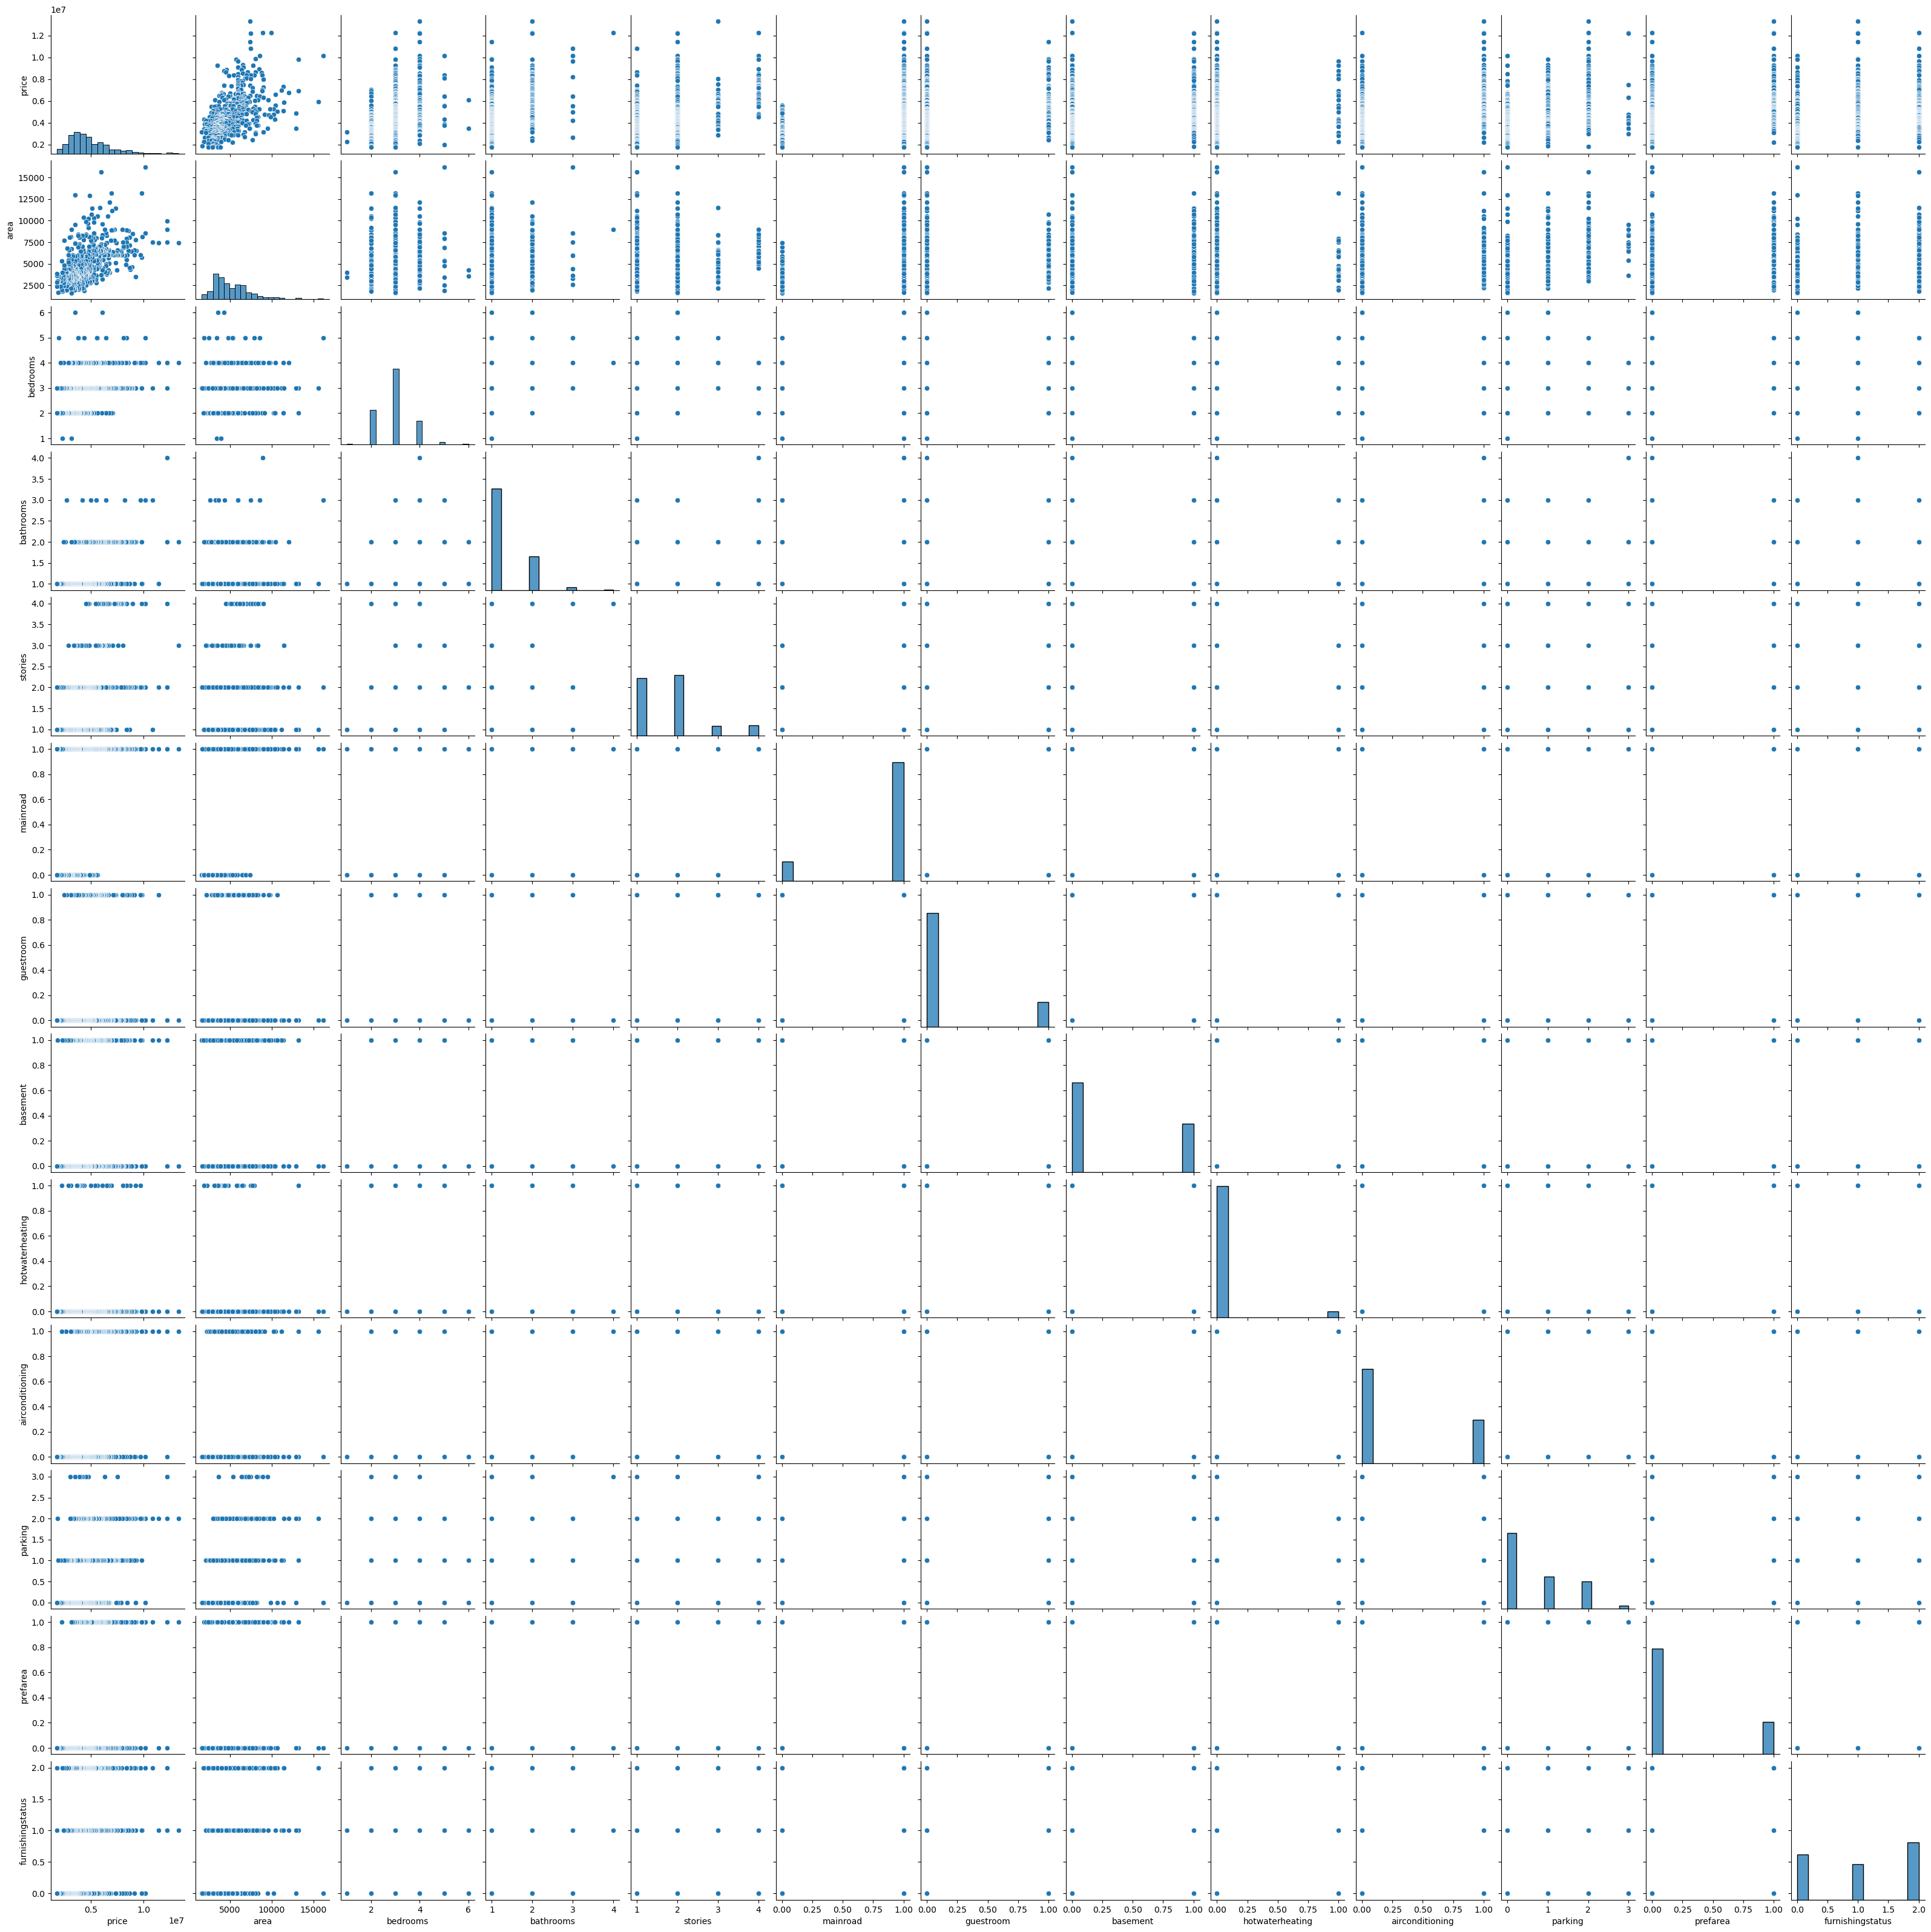

In [14]:
sns.pairplot(df)
plt.show

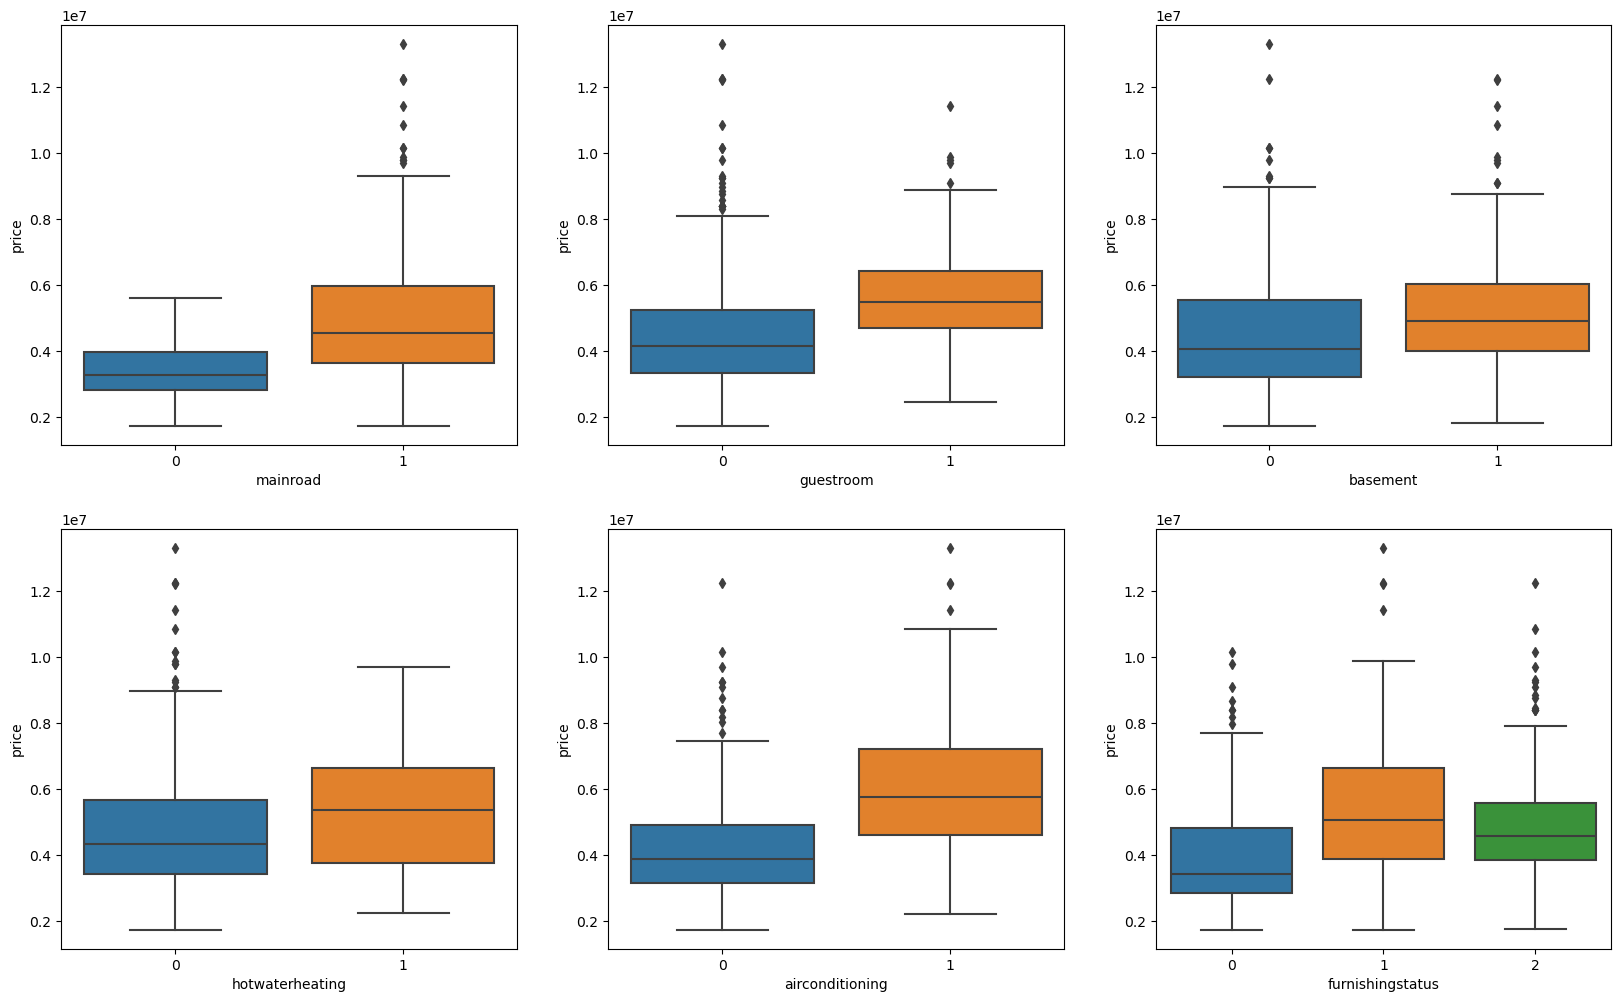

In [15]:
#ploting box plot to find outliers
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = df)

plt.show()

In [16]:
# Outlier Treatment
# We can drop the outliers as we have sufficient data.

##                         IDENTIFYING OUTLIERS USING Z-SCORE

In [17]:
import pandas as pd
import numpy as np

# Example function to detect outliers based on Z-score
def detect_outliers_zscore(df, column_name, threshold=3):
    if df is not None and column_name in df.columns:
        # Calculate Z-scores
        df['Z-Score'] = (df[column_name] - df[column_name].mean()) / df[column_name].std()
        
        # Identify outliers
        outliers = df[df['Z-Score'].abs() > threshold]
        return outliers
    else:
        print("DataFrame is None or column does not exist.")
        return None


# Call the function with the DataFrame and column name
outliers = detect_outliers_zscore(df, 'price')

# Check if outliers were found
if outliers is not None:
    print("Outliers FOUND \n:", outliers)
else:
    print("No outliers found or DataFrame issues")

Outliers FOUND 
:       price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   
5  10850000  7500         3          3        1         1          0   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   
5         1                0                1        2         1   



##                   ADRESSING OUTLIERS

In [18]:
import pandas as pd
import numpy as np

if df is not None and 'price' in df.columns:
    # Calculate Z-scores
    df['Z-Score'] = (df['price'] - df['price'].mean()) / df['price'].std()
    
    # Check if Z-Score column was created
    if 'Z-Score' in df.columns:
        # Remove outliers
        df_no_outliers = df[df['Z-Score'].abs() <= 3]
        print("NO OUTLIER LEFT \n",df_no_outliers.head())  # Display the first few rows without outliers
    else:
        print("'Z-Score' column is missing. Please calculate it first.")
else:
    print("DataFrame is None or 'price' column is missing.")

NO OUTLIER LEFT 
        price   area  bedrooms  bathrooms  stories  mainroad  guestroom  \
6   10150000   8580         4          3        4         1          0   
7   10150000  16200         5          3        2         1          0   
8    9870000   8100         4          1        2         1          1   
9    9800000   5750         3          2        4         1          1   
10   9800000  13200         3          1        2         1          0   

    basement  hotwaterheating  airconditioning  parking  prefarea  \
6          0                0                1        2         1   
7          0                0                0        0         0   
8          1                0                1        2         1   
9          0                0                1        1         1   
10         1                0                1        2         1   

    furnishingstatus   Z-Score  
6                  2  2.878078  
7                  0  2.878078  
8                  1  2

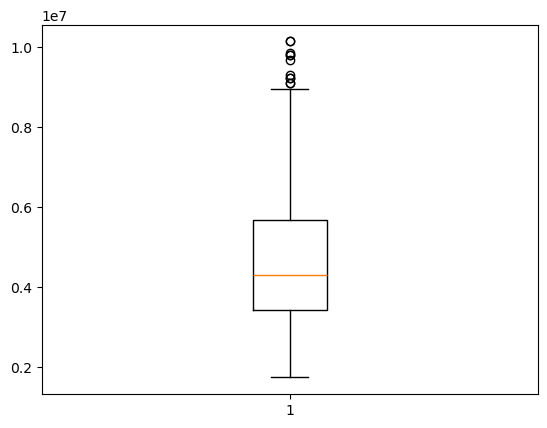

In [19]:
# outlier treatment for price
plt.boxplot(df_no_outliers.price)
Q1 = df_no_outliers.price.quantile(0.25)
Q3 = df_no_outliers.price.quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df_no_outliers[(df_no_outliers.price >= Q1 - 1.5*IQR) & (df_no_outliers.price <= Q3 + 1.5*IQR)]

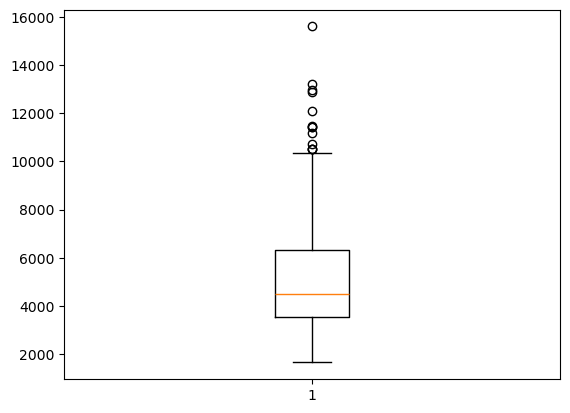

In [20]:
# outlier treatment for area
plt.boxplot(df_no_outliers.area)
Q1 = df_no_outliers.area.quantile(0.25)
Q3 = df_no_outliers.area.quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df_no_outliers[(df_no_outliers.area >= Q1 - 1.5*IQR) & (df_no_outliers.area <= Q3 + 1.5*IQR)]

                                           
##                                           3. FEATURE SELECTION

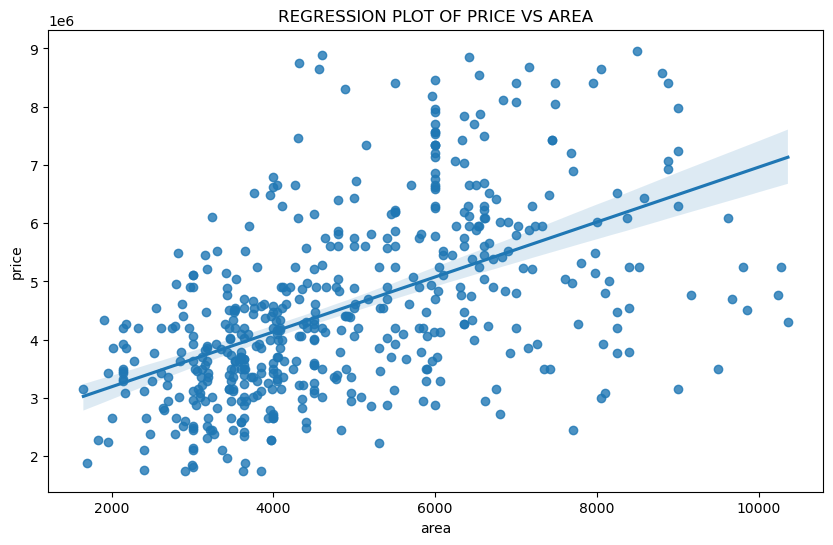

In [21]:
#regression  plot

plt.figure(figsize = ( 10 , 6 ))
sns.regplot( x = "area" , y = "price" , data = df_no_outliers)
plt.title("REGRESSION PLOT OF PRICE VS AREA")
plt.xlabel("area")
plt.ylabel("price")
plt.show()

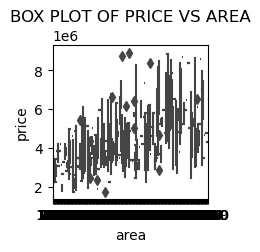

In [22]:
#boxplot 

plt.figure(figsize = ( 2 , 2 ))
sns.boxplot( x = "area" , y = "price" , data = df_no_outliers)
plt.title("BOX PLOT OF PRICE VS AREA")
plt.xlabel("area")
plt.ylabel("price")
plt.show()

In [23]:
df_no_outliers.corr()['price'].sort_values()

hotwaterheating     0.079574
basement            0.178410
furnishingstatus    0.205958
prefarea            0.278657
guestroom           0.300846
mainroad            0.307536
parking             0.315786
bedrooms            0.325808
stories             0.451414
bathrooms           0.469513
airconditioning     0.475856
area                0.533542
price               1.000000
Z-Score             1.000000
Name: price, dtype: float64


##                                                4.MODEL TRAINING

 Create a single feature Linear Regression model that fits the pair of "area" and "Price" to find the model for prediction.

In [24]:
X = df_no_outliers[['area']]
Y = df_no_outliers['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)
Yhat=lm.predict(X)

Generate the Distribution plot for the predicted values and that of the actual values. How well did the model perform?

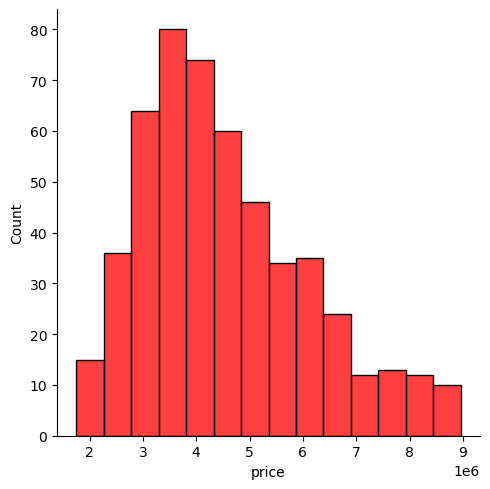

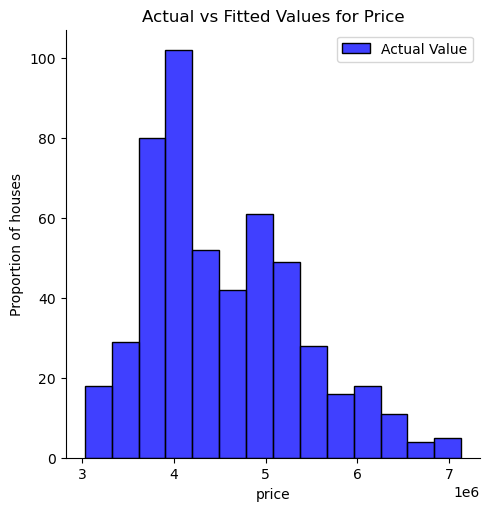

In [25]:
ax1 = sns.displot(df_no_outliers['price'], color="r", label="Actual Value")

# Create a distribution plot for predicted values
sns.displot(Yhat, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('price')
plt.ylabel('Proportion of houses')
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()

Evaluate the Mean Squared Error and R^2 score values for the model.

In [26]:
from sklearn.metrics import mean_squared_error, r2_score
mse_slr = mean_squared_error(df_no_outliers['price'], Yhat)
r2_score_slr = lm.score(X, Y)
print('The R-square for Linear Regression is: ', r2_score_slr)
print('The mean square error of price and predicted value is: ', mse_slr)

The R-square for Linear Regression is:  0.28466693622076356
The mean square error of price and predicted value is:  1765704599761.2053


In [27]:
lm=LinearRegression()
X=df_no_outliers[["basement"]]
Y=df_no_outliers["price"]
lm.fit(X,Y)
predictions=lm.predict(X)

r2_score_slr= lm.score(X,Y)
print("THE R-SQUARED FOR LINEAR REGRESSION IS :", r2_score_slr)

THE R-SQUARED FOR LINEAR REGRESSION IS : 0.031829963183392596


                                       
##                                       5. MODEL EVALUATION AND REFINEMENT

In [28]:


df_no_outliers=df_no_outliers._get_numeric_data()
df_no_outliers.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,Z-Score
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,1,2.241864
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,1,2.204439
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,2,2.185727
20,8750000,4320,3,1,2,1,0,1,1,0,2,0,2,2.129591
21,8680000,7155,3,2,1,1,1,1,0,1,2,0,0,2.092166



Libraries for plotting:

In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
#from ipywidgets import interact, interactive, fixed
print("done")

done



functions for plotting

In [30]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    ax1 = sns.kdeplot(RedFunction, color="r", label=RedName)
    ax2 = sns.kdeplot(BlueFunction, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of houses')
    plt.show()
    plt.close()

In [31]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)
    
    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()


Part 1: Training and Testing
An important step in testing your model is to split your data into training and testing data. We will place the target data price in a separate dataframe y_data:

In [32]:
y_data = df_no_outliers['price']


Drop price data in dataframe x_data:

In [33]:
x_data=df_no_outliers.drop('price',axis=1)


Now, we randomly split our data into training and testing data using the function train_test_split.

In [34]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 52
number of training samples: 463


The test_size parameter sets the proportion of data that is split into the testing set. In the above, the testing set is 10% of the total dataset.

In [35]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0) 
print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])

number of test samples : 206
number of training samples: 309


We create a Linear Regression object:

In [36]:
lre=LinearRegression()

Let's calculate the R^2 on the test data:

In [37]:
#features=["mainroad", "guestroom","basement","hotwaterheating","airconditioning","prefarea","furnishingstatus","area","parking","stories","bathrooms","bedrooms"]
X = x_test[['area']]
Y = y_test
#lm = LinearRegression()
lre.fit(X,Y)
lre.score(X, Y)


#lre.score(x_test[features], y_test)

0.20587086817374944


We can see the R^2 is much smaller using the test data compared to the training data.

In [38]:
lre.score(x_train[['area']], y_train)

0.2756357243190283

 R^2 on the test data using 40% of the dataset for testing.

In [39]:

x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)
lre.fit(x_train1[['area']],y_train1)
lre.score(x_test1[['area']],y_test1)

0.3122599920668253

Sometimes you do not have sufficient testing data; as a result, you may want to perform cross-validation. Let's go over several methods that you can use for cross-validation.

Cross-Validation Score
Let's import cross_val_score from the module model_selection

In [40]:
from sklearn.model_selection import cross_val_score

We input the object, the feature ("area"), and the target data (y_data). The parameter 'cv' determines the number of folds. In this case, it is 4

In [41]:
Rcross = cross_val_score(lre, x_data[['area']], y_data, cv=4)


The default scoring is R^2. Each element in the array has the average R^2 value for the fold:

In [42]:
Rcross

array([ -7.19469317,  -9.65406986, -12.89624019, -17.49172654])

We can calculate the average and standard deviation of our estimate:

In [43]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are -11.809182441668096 and the standard deviation is 3.8539273282199265


the average R^2 using two folds, then find the average R^2 for the second fold utilizing the "horsepower" feature:

In [44]:
Rc=cross_val_score(lre,x_data[['area']], y_data,cv=2)
Rc.mean()

-7.369158961335475

# r-squared value is smaller and its cross validation value is negative cause overfitting

##  Apply regularization techniques to prevent overfitting.

It turns out that the test data, sometimes referred to as the "out of sample data", is a much better measure of how well your model performs in the real world. One reason for this is overfitting.

Let's go over some examples. It turns out these differences are more apparent in Multiple Linear Regression and Polynomial Regression so we will explore overfitting in that context.

Let's create Multiple Linear Regression objects and train the model using "mainroad", "guestroom","basement","hotwaterheating","airconditioning","prefarea","furnishingstatus","parking","stories","bathrooms","bedrooms" as features.

In [45]:
features=["mainroad", "guestroom","basement","hotwaterheating","airconditioning","prefarea","furnishingstatus","area","parking","stories","bathrooms","bedrooms"]

lr = LinearRegression()

lr.fit(x_train[features], y_train)

LinearRegression()


Prediction using training data:

In [46]:
yhat_train = lr.predict(x_train[features])
yhat_train[0:5]

array([4250649.00219247, 4770890.44304493, 5852089.38585177,
       3601575.57588597, 3850677.25783253])


Prediction using test data:

In [47]:
yhat_test = lr.predict(x_test[features])
yhat_test[0:5]

array([4967252.0051532 , 4615258.83928965, 4511205.41213562,
       4116956.0892342 , 2795226.37985632])

Let's perform some model evaluation using our training and testing data separately. First, we import the seaborn and matplotlib library for plotting.

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Let's examine the distribution of the predicted values of the training data.

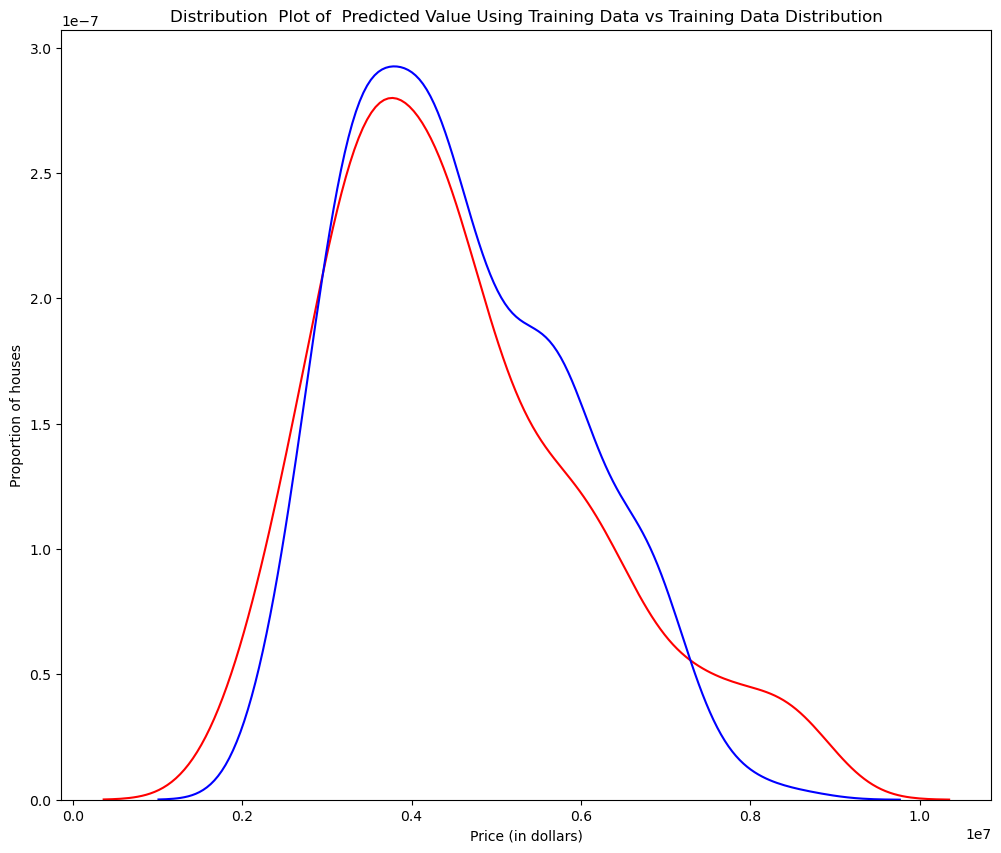

In [49]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

the model generates new values from the test data, we see the distribution of the predicted values is much different from the actual target values.

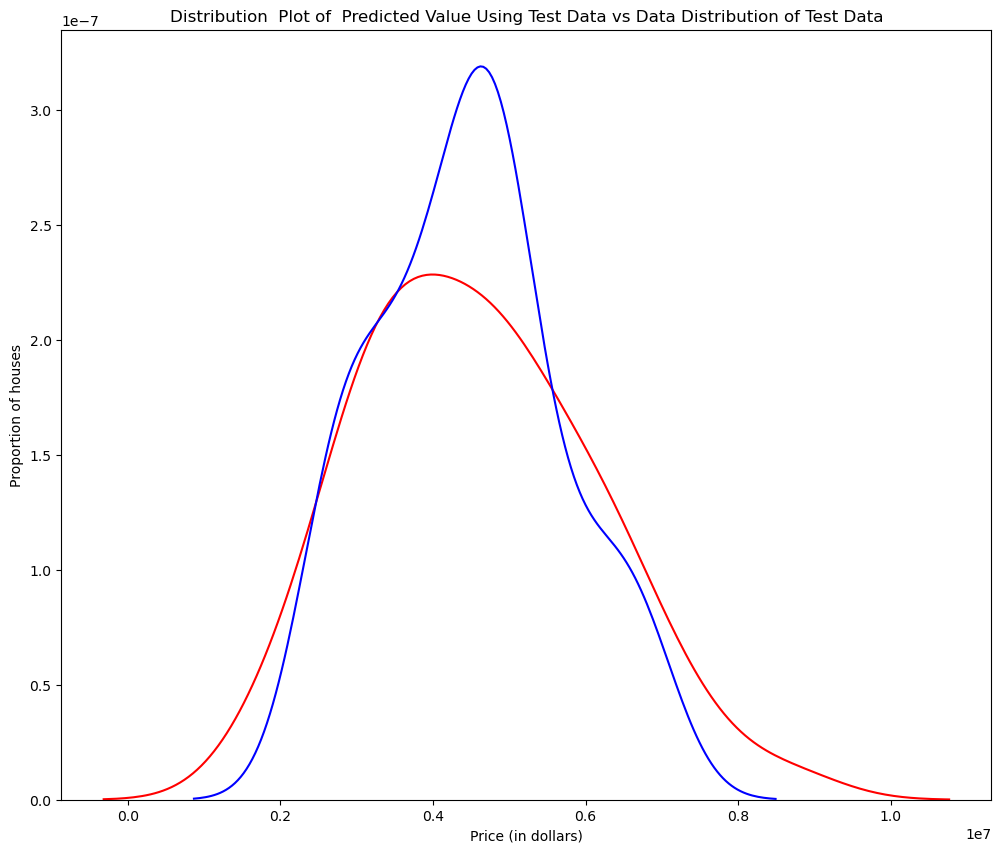

In [50]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Comparing Figure 1 and Figure 2, it is evident that the distribution of the test data in Figure 1 is much better at fitting the data. This difference in Figure 2 is apparent in the range of 0.2 to 0.6. This is where the shape of the distribution is extremely different. Let's see if polynomial regression also exhibits a drop in the prediction accuracy when analysing the test dataset.

In [51]:
from sklearn.preprocessing import PolynomialFeatures

Overfitting
Overfitting occurs when the model fits the noise, but not the underlying process. Therefore, when testing your model using the test set, your model does not perform as well since it is modelling noise, not the underlying process that generated the relationship. Let's create a degree 5 polynomial model.

Let's use 55 percent of the data for training and the rest for testing:

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

We will perform a degree 5 polynomial transformation on the feature 'area'.

In [53]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['area']])
x_test_pr = pr.fit_transform(x_test[['area']])
pr

PolynomialFeatures(degree=5)


Now, let's create a Linear Regression model "poly" and train it.

In [54]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

We can see the output of our model using the method "predict." We assign the values to "yhat"

In [55]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([3821315.4680601 , 5601545.48384592, 5473248.4014469 ,
       5259400.37545243, 3865650.99619819])


Let's take the first five predicted values and compare it to the actual targets.

In [56]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [3821315.4680601  5601545.48384592 5473248.4014469  5259400.37545243]
True values: [4095000 5950000 7350000 6930000]


We will use the function "PollyPlot" that we defined at the beginning of the lab to display the training data, testing data, and the predicted function.

In [57]:
#PollyPlot(x_train['area'], x_test['area'], y_train, y_test, poly,pr)


R^2 of the training data:

In [58]:
poly.score(x_train_pr, y_train)

0.3269654149762281


R^2 of the test data:

In [59]:
poly.score(x_test_pr, y_test)

0.3436075382038677

# ridge regression

Ridge Regression
In this section, we will review Ridge Regression and see how the parameter alpha changes the model. Just a note, here our test data will be used as validation data.

Let's perform a degree two polynomial transformation on our data.

In [60]:
pr=PolynomialFeatures(degree=2)
features=["mainroad", "guestroom","basement","hotwaterheating","airconditioning","prefarea","furnishingstatus","area","parking","stories","bathrooms","bedrooms"]

x_train_pr=pr.fit_transform(x_train[features])
x_test_pr=pr.fit_transform(x_test[features])

Let's import Ridge from the module linear models.

In [61]:
from sklearn.linear_model import Ridge

Let's create a Ridge regression object, setting the regularization parameter (alpha) to 0.1

In [62]:
RigeModel=Ridge(alpha=10)

Like regular regression, you can fit the model using the method fit.

In [63]:
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=10)


Similarly, you can obtain a prediction:

In [64]:
yhat = RigeModel.predict(x_test_pr)

Let's compare the first five predicted samples to our test set:

In [65]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [4169045.57977356 6457711.78594789 6159053.87629188 7735517.00503644]
test set : [4095000 5950000 7350000 6930000]



We select the value of alpha that minimizes the test error. To do so, we can use a for loop. We have also created a progress bar to see how many iterations we have completed so far.

In [66]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

  1%|          | 7/1000 [00:00<00:14, 68.11it/s, Test Score=0.643, Train Score=0.738]

100%|██████████| 1000/1000 [00:10<00:00, 91.48it/s, Test Score=0.619, Train Score=0.7]  



We can plot out the value of R^2 for different alphas:

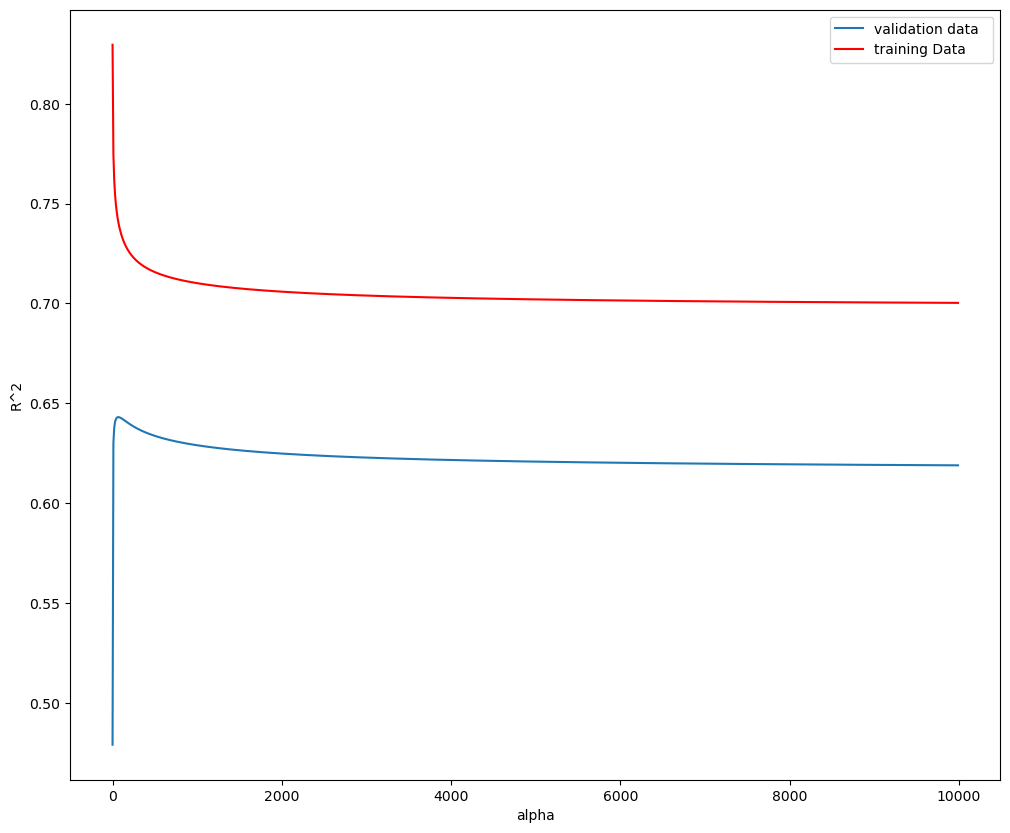

In [67]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()


The blue line represents the R^2 of the validation data, and the red line represents the R^2 of the training data. The x-axis represents the different values of Alpha.

Here the model is built and tested on the same data, so the training and test data are the same.

The red line in a above Figure represents the R^2 of the training data. As alpha increases the R^2 decreases. Therefore, as alpha increases, the model performs worse on the training data

The blue line represents the R^2 on the validation data. As the value for alpha increases, the R^2 increases and converges at a point.

# grid search

# Hyperparameter Tuning: Use techniques like grid search or randomized search to find optimal hyperparameters.

Grid Search
The term alpha is a hyperparameter. Sklearn has the class GridSearchCV to make the process of finding the best hyperparameter simpler.

Let's import GridSearchCV from the module model_selection

In [68]:
from sklearn.model_selection import GridSearchCV

We create a dictionary of parameter values:


In [69]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]


Create a Ridge regression object:

In [70]:
RR=Ridge()
RR

Ridge()


Create a ridge grid search object:

In [71]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)


Fit the model:

In [72]:
Grid1.fit(x_data[features], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

The object finds the best parameter values on the validation data. We can obtain the estimator with the best parameters and assign it to the variable BestRR as follows:

In [73]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10)

We now test our model on the test data:

In [74]:
BestRR.score(x_test[features], y_test)

0.6658532852428193

Perform a grid search for the alpha parameter and the normalization parameter, then find the best values of the parameters:

In [75]:
parameters2 = [{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

Grid2 = GridSearchCV(Ridge(), parameters2, cv=4)
Grid2.fit(x_data[features], y_data)
best_alpha = Grid2.best_params_['alpha']
best_ridge_model = Ridge(alpha=best_alpha)
best_ridge_model.fit(x_data[features], y_data)

Ridge(alpha=10)

In [76]:
from sklearn.linear_model import Ridge

RidgeModel=Ridge(alpha=10)
RidgeModel.fit(x_train,y_train)
RidgeModel.score(x_test,y_test)


0.9941034255974218

                                             
                                             
##                                            6. VISUALIZATION

# generate a distribution plot for predicted and actual value

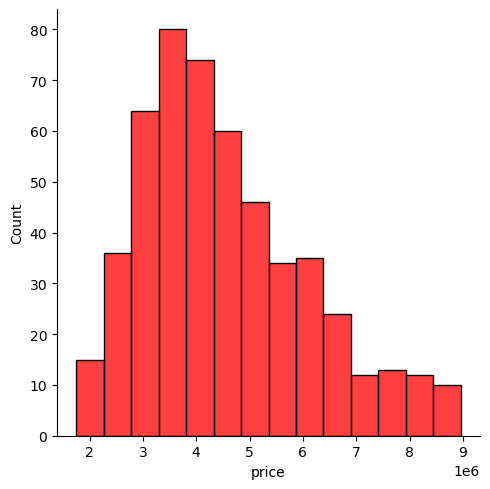

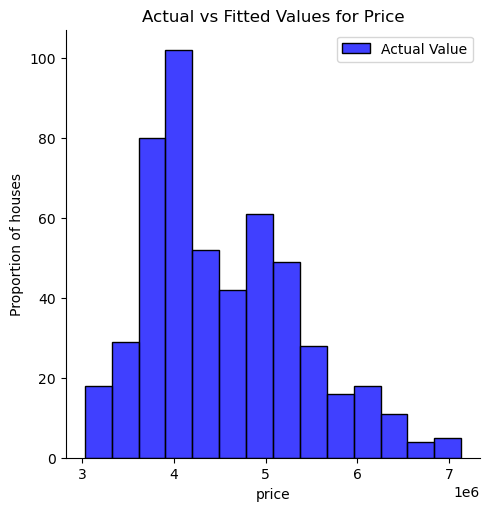

In [77]:
ax1 = sns.displot(df_no_outliers['price'], color="r", label="Actual Value")

# Create a distribution plot for predicted values
sns.displot(Yhat, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('price')
plt.ylabel('Proportion of houses')
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()

generate a regression plot 

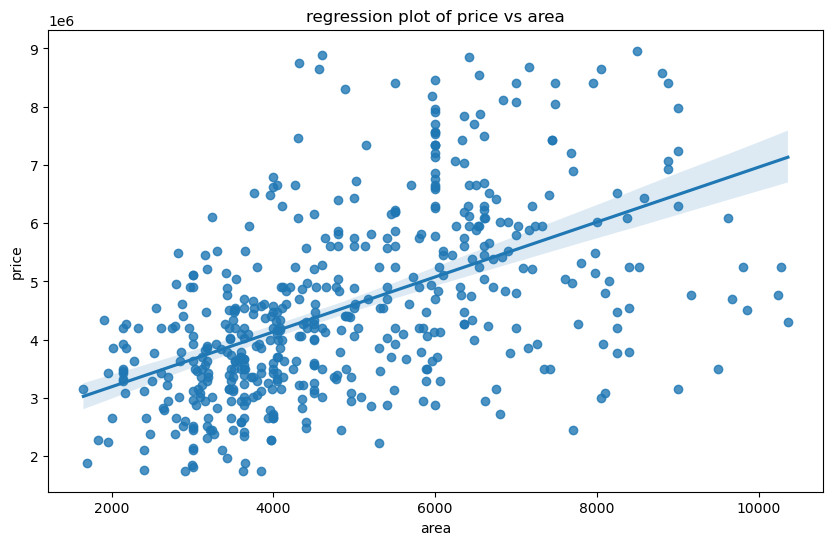

In [78]:
plt.figure(figsize=(10,6))
sns.regplot(x='area',y='price',data=df_no_outliers)
plt.title('regression plot of price vs area')
plt.xlabel('area')
plt.ylabel('price')
plt.show()

 # residual plot for predicted and actual values

Train a Linear Regression Model

In [79]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_data, y_data, test_size=0.55, random_state=0) 
#print("number of test samples :", x_test1.shape[0])
#print("number of training samples:",x_train1.shape[0])


# Train the model
model = LinearRegression()
model.fit(x_train2, y_train2)

# Make predictions
y_pred = model.predict(x_test2)

 Calculate Residuals and R-squared

In [80]:
# Calculate residuals
residuals = y_test2 - y_pred

# Calculate R-squared
r_squared = r2_score(y_test2, y_pred)
print(f'R-squared: {r_squared}')

R-squared: 1.0


# Plot the Residuals

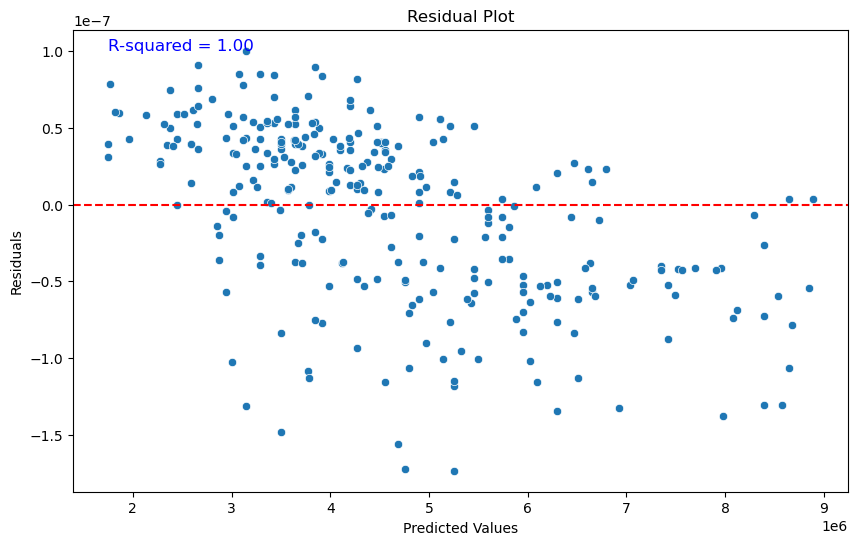

In [81]:
# Create a residual plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

# Annotate R-squared value
plt.text(min(y_pred), max(residuals), f'R-squared = {r_squared:.2f}', fontsize=12, color='blue')

plt.show()

Interpretation
R-squared Value: The R-squared value printed and annotated on the plot indicates how well the independent variable(s) explain the variance in the dependent variable.
Residual Plot: If the residuals are randomly scattered around the horizontal axis (y=0), it suggests a good fit. Patterns in the residuals could indicate model issues like non-linearity or heteroscedasticity.
This approach provides both a visual and quantitative assessment of your model's performance.

generate a scatter plot

<Axes: xlabel='area', ylabel='price'>

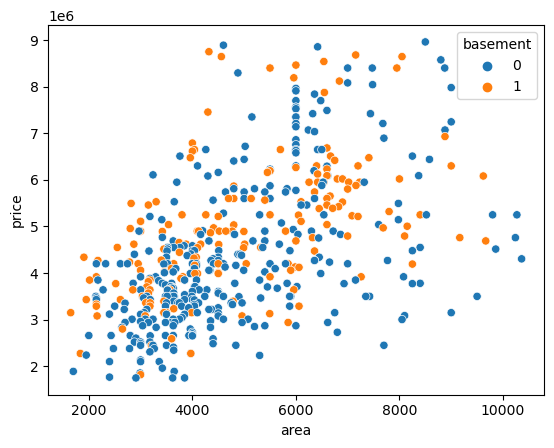

In [82]:
sns.scatterplot(x=df_no_outliers['area'],y=df_no_outliers['price'],hue=df_no_outliers['basement'])

generate a line plot

<Axes: ylabel='price'>

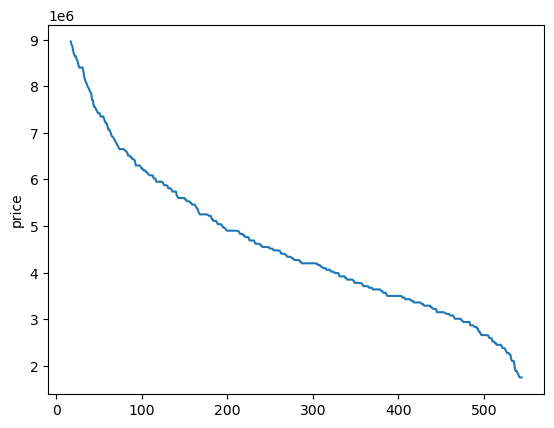

In [83]:
sns.lineplot(data=df_no_outliers['price'])

In [84]:
df_no_outliers

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,Z-Score
17,8960000,8500,3,2,4,1,0,0,0,1,2,0,1,2.241864
18,8890000,4600,3,2,2,1,1,0,0,1,2,0,1,2.204439
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,2,2.185727
20,8750000,4320,3,1,2,1,0,1,1,0,2,0,2,2.129591
21,8680000,7155,3,2,1,1,1,1,0,1,2,0,0,2.092166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,-1.575421
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,2,-1.603676
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,-1.612845
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1,-1.612845


In [85]:
df_no_outliers.shape

(515, 14)

In [86]:
df_no_outliers.to_csv("/home/ammar-ahmed-siddiqui/Downloads/submission1.csv")

AUTHOR


FARYAL SHAKEEL
BS-COMPUTER SCIENCE


OASIS-INFOBYTE
DATA ANALYTICS INTERNSHIP
